# import Library

In [12]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

# 디스코에 넣을 수 있는 csv 파일 만들기

In [13]:
cwd = os.getcwd()
print('현재 폴더 경로 : ', cwd)
# 폴더 위치 변경
os.chdir("C:\\Users\hyunj\\Dropbox\\종합설계프로젝트\\중요\\데이터\\")
print('변경 후 폴더 경로 : ', cwd)
print('현재 폴더 파일 : ', os.listdir())
data = pd.read_csv('Container perspective.csv')
print('feature 항목 : ', data.columns)
data

현재 폴더 경로 :  C:\Users\hyunj\Dropbox\종합설계프로젝트\중요\데이터
변경 후 폴더 경로 :  C:\Users\hyunj\Dropbox\종합설계프로젝트\중요\데이터
현재 폴더 파일 :  ['Block perspective.csv', 'CHE I perspective.csv', 'CHE II perspective.csv', 'Container Data.csv', 'Container perspective.csv', 'Data.csv', 'DS.csv', 'DStoLD.csv', 'Dwell Time', 'Gate perspective.csv', 'GI perspective.csv', 'GO perspective.csv', 'ITV perspective.csv', 'LD.csv', 'QC perspective.csv', 'TC Data', 'TC Data.csv', 'TC224.csv', 'TC224_DS.csv', 'TC224_GI.csv', 'TC224_LD.csv', 'Vessel perspective.csv']
feature 항목 :  Index(['Unnamed: 0', 'VESSEL', 'CONTAINER_NO', 'MCHN_ID', 'MCHN_TP_CD',
       'FULL_EMPTY', 'JOB_TYPE', 'POD', 'BLOCK_BAY', 'JOB_START_DT',
       'JOB_END_DT'],
      dtype='object')


,Unnamed: 0,VESSEL,CONTAINER_NO,MCHN_ID,MCHN_TP_CD,FULL_EMPTY,JOB_TYPE,POD,BLOCK_BAY,JOB_START_DT,JOB_END_DT
0,1,ALAP-001/2018,AXIU1484082-2,GC112,QC,F,DS-QUAYSIDE,KRPUS,1B-38,20180131211752,20180131211924
1,2,ALAP-001/2018,AXIU1484082-2,TC221,TC,F,DS-YARDSIDE,KRPUS,1B-38,20180131213633,20180131213805
2,3,ALAP-001/2018,AXIU1484082-2,YT511,YT,F,DS-MOVE,KRPUS,1B-38,20180131211924,20180131213633
3,4,ALAP-001/2018,BEAU2976719-1,GC111,GC,F,LD-QUAYSIDE,CAVAN,2B-19,20180131202120,20180131202353
4,5,ALAP-001/2018,BEAU2976719-1,TC223,TC,F,LD-YARDSIDE,CAVAN,2B-19,20180131200147,20180131200420
...,...,...,...,...,...,...,...,...,...,...,...
424321,424322,SXNW-001/2018,XINU1481982-2,TC225,TC,F,LD-YARDSIDE,CAPRR,3B-43,20180130005307,20180130005540
424322,424323,SXNW-001/2018,XINU1481982-2,YT505,YT,F,LD-MOVE,CAPRR,3B-43,20180130005540,20180130010743
424323,424324,SXNW-001/2018,YMLU3166534-1,GC111,GC,F,LD-QUAYSIDE,CAPRR,1D-45,20180129224745,20180129225018
424324,424325,SXNW-001/2018,YMLU3166534-1,TC242,TC,F,LD-YARDSIDE,CAPRR,1D-45,20180129224307,20180129224540


In [14]:
# 데이터 프레임 Datetime 변환
data['JOB_START_DT'] = data['JOB_START_DT'].astype('str')
data['JOB_END_DT'] = data['JOB_END_DT'].astype('str')

data['JOB_START_DT'] = pd.to_datetime(data['JOB_START_DT'])
data['JOB_END_DT'] = pd.to_datetime(data['JOB_END_DT'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424326 entries, 0 to 424325
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    424326 non-null  int64         
 1   VESSEL        424326 non-null  object        
 2   CONTAINER_NO  424326 non-null  object        
 3   MCHN_ID       424317 non-null  object        
 4   MCHN_TP_CD    424317 non-null  object        
 5   FULL_EMPTY    424326 non-null  object        
 6   JOB_TYPE      424326 non-null  object        
 7   POD           424326 non-null  object        
 8   BLOCK_BAY     424326 non-null  object        
 9   JOB_START_DT  424326 non-null  datetime64[ns]
 10  JOB_END_DT    424326 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 35.6+ MB


In [29]:
data['Day']=data['JOB_START_DT'].dt.day
data['Month']=data['JOB_START_DT'].dt.month 
data['Year']=data['JOB_START_DT'].dt.year 
# 0 : 월요일 / 6 : 일요일
data['Days'] = data['JOB_START_DT'].dt.weekday
data

,Unnamed: 0,VESSEL,CONTAINER_NO,MCHN_ID,MCHN_TP_CD,FULL_EMPTY,JOB_TYPE,POD,BLOCK_BAY,JOB_START_DT,JOB_END_DT,Day,Month,Year,Days
0,1,ALAP-001/2018,AXIU1484082-2,GC112,QC,F,DS-QUAYSIDE,KRPUS,1B-38,2018-01-31 21:17:52,2018-01-31 21:19:24,31,1,2018,2
1,2,ALAP-001/2018,AXIU1484082-2,TC221,TC,F,DS-YARDSIDE,KRPUS,1B-38,2018-01-31 21:36:33,2018-01-31 21:38:05,31,1,2018,2
2,3,ALAP-001/2018,AXIU1484082-2,YT511,YT,F,DS-MOVE,KRPUS,1B-38,2018-01-31 21:19:24,2018-01-31 21:36:33,31,1,2018,2
3,4,ALAP-001/2018,BEAU2976719-1,GC111,GC,F,LD-QUAYSIDE,CAVAN,2B-19,2018-01-31 20:21:20,2018-01-31 20:23:53,31,1,2018,2
4,5,ALAP-001/2018,BEAU2976719-1,TC223,TC,F,LD-YARDSIDE,CAVAN,2B-19,2018-01-31 20:01:47,2018-01-31 20:04:20,31,1,2018,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424321,424322,SXNW-001/2018,XINU1481982-2,TC225,TC,F,LD-YARDSIDE,CAPRR,3B-43,2018-01-30 00:53:07,2018-01-30 00:55:40,30,1,2018,1
424322,424323,SXNW-001/2018,XINU1481982-2,YT505,YT,F,LD-MOVE,CAPRR,3B-43,2018-01-30 00:55:40,2018-01-30 01:07:43,30,1,2018,1
424323,424324,SXNW-001/2018,YMLU3166534-1,GC111,GC,F,LD-QUAYSIDE,CAPRR,1D-45,2018-01-29 22:47:45,2018-01-29 22:50:18,29,1,2018,0
424324,424325,SXNW-001/2018,YMLU3166534-1,TC242,TC,F,LD-YARDSIDE,CAPRR,1D-45,2018-01-29 22:43:07,2018-01-29 22:45:40,29,1,2018,0


In [19]:
daily_count = data.groupby(["Year","Month", "Day"]).agg({"CONTAINER_NO":"count"})
daily_count

CONTAINER_NO
Year Month Day              
2018 1     1           15151
           2           18310
           3           10298
           4           11265
           5           11709
           6           18670
           7           16038
           8           16249
           9            8949
           10           9663
           11          10086
           12          13876
           13          13710
           14          18238
           15          14528
           16          11655
           17          12922
           18           8608
           19          12545
           20          15078
           21          15161
           22          11681
           23          15458
           24          12197
           25          10192
           26          14072
           27          13983
           28          16597
           29          13872
           30          16702
           31          16861
     2     1               2

<AxesSubplot:xlabel='Day'>

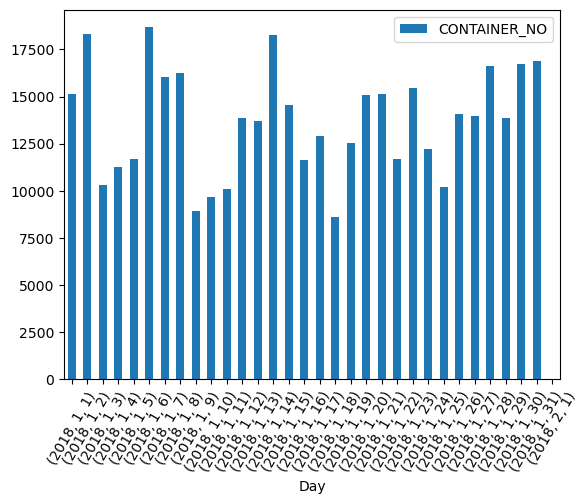

In [30]:
# 일 별로 시각화
daily_count['Day'] = daily_count.index
daily_count.plot.bar(x='Day', y='CONTAINER_NO', rot=60)

<AxesSubplot:xlabel='Day'>

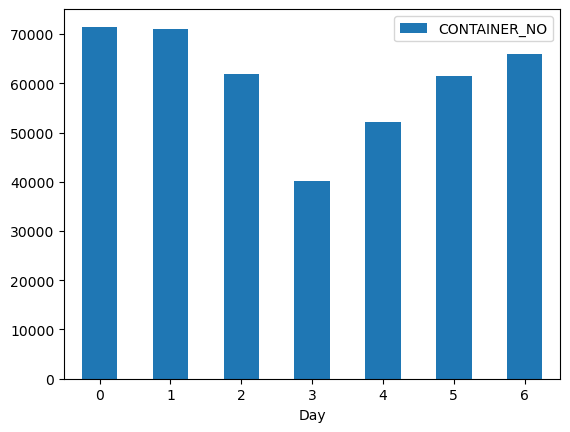

In [31]:
# 요일별로 시각화
day_of_week_count = data.groupby(["Days"]).agg({"CONTAINER_NO":"count"})
day_of_week_count['Day'] = day_of_week_count.index
day_of_week_count.plot.bar(x='Day', y='CONTAINER_NO', rot=0)